# Full Neural Network

We use the handwritten numbers from the MNIST database. Download the files from <a href="http://yann.lecun.com/exdb/mnist/">http://yann.lecun.com/exdb/mnist/</a> and unzip them into the same folder with this Jupyter notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct

# Load MNIST-files into numpy arrays
# http://yann.lecun.com/exdb/mnist/
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

## Load the training and test images

In [2]:
X_train = read_idx('train-images.idx3-ubyte')
y_train = read_idx('train-labels.idx1-ubyte')
X_test = read_idx('t10k-images.idx3-ubyte')
y_test = read_idx('t10k-labels.idx1-ubyte')


# Scale the grayscale values [0, 255] into [0, 1]
X_train = X_train.astype('float32')
X_train /= 255
X_train = X_train.reshape(60000, 784)
X_test = X_test.astype('float32')
X_test /= 255
X_test = X_test.reshape(10000, 784)

# Convert the target values into a "one hot" array,
# for axample: 4 -> [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Y_train = np.zeros((60000, 10))
Y_test = np.zeros((10000, 10))
for k in range(0, 60000):
    Y_train[k, y_train[k]] = 1
for k in range(0, 10000):
    Y_test[k, y_test[k]] = 1

## Train the network using the backpropagation algorithm

Epoch 0 :    J =  0.301968599174
Epoch 1 :    J =  0.169226673194
Epoch 2 :    J =  0.122336486292
Epoch 3 :    J =  0.100630613881
Epoch 4 :    J =  0.0910060132552
Epoch 5 :    J =  0.0890566056056
Epoch 6 :    J =  0.0852122696759
Epoch 7 :    J =  0.0798008755016
Epoch 8 :    J =  0.0750097775056
Epoch 9 :    J =  0.0713552422062
Epoch 10 :    J =  0.0676882915496
Epoch 11 :    J =  0.0640774969618
Epoch 12 :    J =  0.0614171858638
Epoch 13 :    J =  0.0599291629291
Epoch 14 :    J =  0.0591251461879
Epoch 15 :    J =  0.0580315600044
Epoch 16 :    J =  0.0562594020295
Epoch 17 :    J =  0.0540028497434
Epoch 18 :    J =  0.0515162466472
Epoch 19 :    J =  0.0491338225029
Epoch 20 :    J =  0.0470304467704
Epoch 21 :    J =  0.0451659707195
Epoch 22 :    J =  0.0434832432809
Epoch 23 :    J =  0.0420753618343
Epoch 24 :    J =  0.040970955986
Epoch 25 :    J =  0.0401365951093
Epoch 26 :    J =  0.0395383386785
Epoch 27 :    J =  0.0391286170951
Epoch 28 :    J =  0.0388568258122


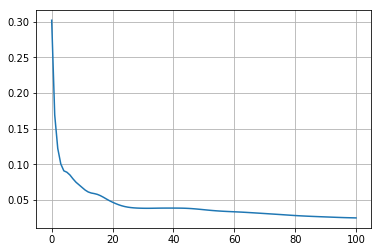

In [3]:
# Initialize the coefficients with random values between [-1, 1]
W1 = 2*np.random.random((16, 785)) - 1
W2 = 2*np.random.random((16, 17)) - 1
W3 = 2*np.random.random((10, 17))- 1

alpha = 0.5
N = 60000 # Number of training images
epochs = 100
J = np.zeros(epochs+1)  # Square errors, only for printing


for epoch in range(0, epochs+1):
    for m in range(0, N, 100): # Batch size 100
        
        error = 0
        D1 = 0
        D2 = 0
        D3 = 0
    
        for k in range(0, 100):
            n = m + k
            A1 = np.append(1, X_train[n, :]).reshape((785, 1))
            Y = Y_train[n, :].reshape((10, 1))
            
            # Feed forward
            A2 = np.append(1, sigmoid(np.dot(W1, A1))).reshape((17, 1))
            A3 = np.append(1, sigmoid(np.dot(W2, A2))).reshape((17, 1))
            A4 = sigmoid(np.dot(W3, A3))
            
            # Calculate the square error, used only for printing
            error = error + np.dot((A4 - Y).transpose(), (A4 - Y))
            
            # Backpropagation
            d4 = A4 - Y
            d3 = A3 * (1 - A3) * np.dot(W3.transpose(), d4)
            d3 = d3[1:]  # Remove the error of the constant a_0 = 1
            d2 = A2 * (1 - A2) * np.dot(W2.transpose(), d3)
            d2 = d2[1:]  # Remove the error of the constant a_0 = 1
        
            D3 = D3 + np.dot(d4, A3.transpose())
            D2 = D2 + np.dot(d3, A2.transpose())
            D1 = D1 + np.dot(d2, A1.transpose())
        
        W1 = W1 - alpha*D1/100
        W2 = W2 - alpha*D2/100
        W3 = W3 - alpha*D3/100
    
    J[epoch] = error/100
    print('Epoch', epoch, ':    J = ', J[epoch])
    
plt.figure()
plt.plot(J)
plt.grid()
plt.show()

## Test the accuracy of the network

In [4]:
n_correct = 0  # Number of correctly classified images

for k in range(0, 10000):
    A1 = np.append(1, X_test[k, :]).reshape((785, 1))
    A2 = np.append(1, sigmoid(np.dot(W1, A1))).reshape((17, 1))
    A3 = np.append(1, sigmoid(np.dot(W2, A2))).reshape((17, 1))
    A4 = sigmoid(np.dot(W3, A3))
    
    if (np.argmax(A4) == y_test[k]):
        n_correct = n_correct + 1
        
print('Accuracy =', n_correct/10000)

Accuracy = 0.9485


## Use the network to recognize the test images

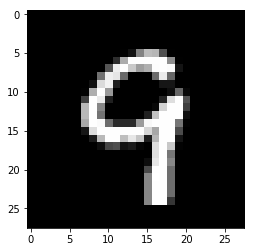

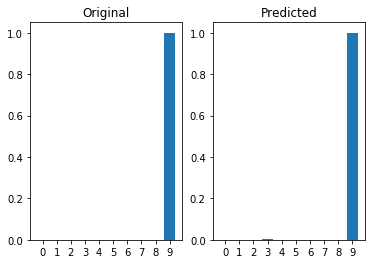

In [7]:
n = 150  # <= Change this to choose a test image [0, 9999]

# This is the Complete Neural Network Forward Pass
A1 = np.append(1, X_test[n, :]).reshape((785, 1))
A2 = np.append(1, sigmoid(np.dot(W1, A1))).reshape((17, 1))
A3 = np.append(1, sigmoid(np.dot(W2, A2))).reshape((17, 1))
A4 = sigmoid(np.dot(W3, A3))


# Compare the prediction with the correct label
Y = Y_test[n, :].reshape((10, 1))

plt.figure(1)
image = X_test[n, :].reshape(28, 28)
plt.imshow(image, cmap='gray')
    
plt.figure(2)
ind = np.arange(0, 10)
plt.subplot(1, 2, 1)
plt.bar(ind, Y.flatten())
plt.xticks(range(10))
plt.title('Original')
    
plt.subplot(1, 2, 2)
plt.bar(ind, A4.flatten())
plt.xticks(range(10))
plt.title('Predicted')
   
plt.show()